# Data Analytics Project - Pair 1

# SARIMA Model
---

# Things To Do

1. Get all relevant datasets. *__DONE__*
2. Decide prediction timeline for the pair. *__DONE__*
3. Create Bajaj training dataset. *__DONE__*
4. Create Bajaj Model and train model.
   - https://colah.github.io/posts/2015-08-Understanding-LSTMs/
   - https://www.datacamp.com/community/tutorials/lstm-python-stock-market
5. Generate predicitions using the Bajaj model.
6. Visualize the predictions and data for Bajaj.
7. Repeat and keep changing parameters and timelines until you get most accurate predicitons for Bajaj.
8. Create Hero training dataset.
9. Create Hero Model and train model.
10. Generate predicitions using the Hero model.
11. Visualize the predictions and data for Hero.
12. Repeat and keep changing parameters and timelines until you get most accurate predicitons for Hero.
---

# 0. Importing all required libraries

In [17]:
import os
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

---

# 1. Get all relevant datasets

### 1.1. BAJAJ Dataset

In [18]:
bajaj_df = pd.read_csv("../../Storage/Companies_with_names_exchange/BAJAJ-AUTONSE.csv")

In [19]:
bajaj_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Company,Exchange
0,2017-01-02,2654.300049,2552.000000,2642.699951,2598.500000,323342.0,2336.084473,BAJAJ-AUTO,NSE
1,2017-01-03,2632.199951,2561.449951,2594.000000,2619.199951,420196.0,2354.694336,BAJAJ-AUTO,NSE
2,2017-01-04,2698.550049,2615.949951,2625.199951,2684.100098,343922.0,2413.040283,BAJAJ-AUTO,NSE
3,2017-01-05,2730.000000,2685.000000,2694.000000,2723.350098,188686.0,2448.326416,BAJAJ-AUTO,NSE
4,2017-01-06,2739.899902,2696.699951,2721.000000,2707.350098,159484.0,2433.942383,BAJAJ-AUTO,NSE


### 1.2. How the dataset of Bajaj Looks over 3 years

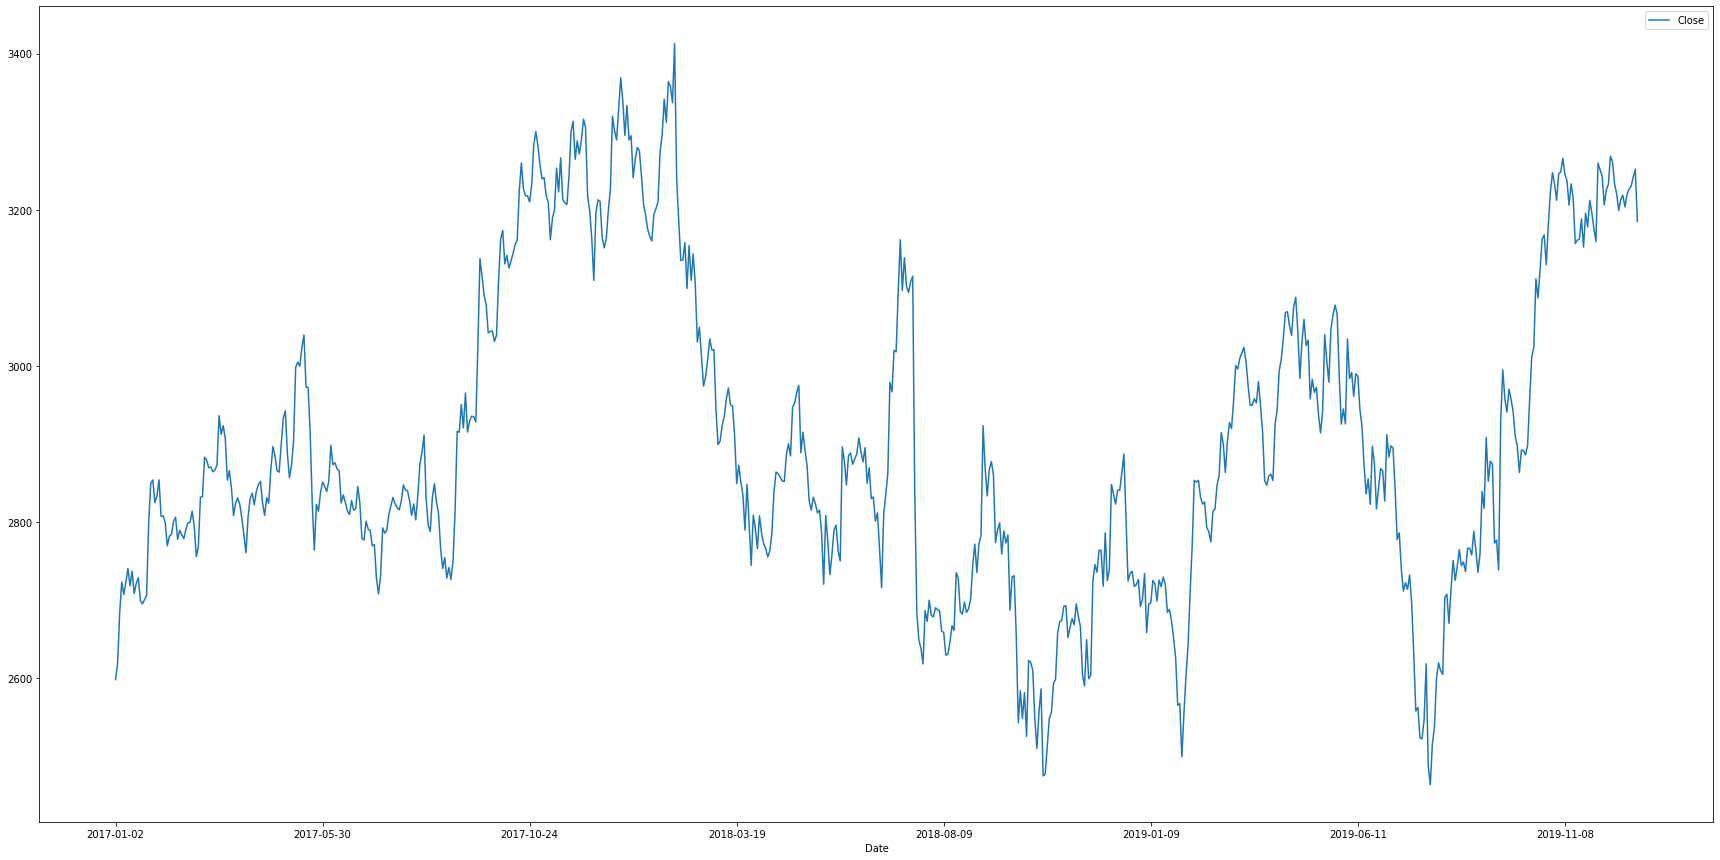

In [20]:
bajaj_df.plot(x='Date', y=['Close'], figsize=(30,15))

### 1.3. HERO Dataset

In [21]:
hero_df = pd.read_csv("../../Storage/Companies_with_names_exchange/HEROMOTOCONSE.csv")

In [22]:
hero_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Company,Exchange
0,2017-01-02,3068.949951,2992.550049,3042.000000,3030.550049,213654.0,2625.101074,HEROMOTOCO,NSE
1,2017-01-03,3016.149902,2962.550049,2978.000000,2986.550049,454277.0,2586.987549,HEROMOTOCO,NSE
2,2017-01-04,3017.300049,2971.000000,2999.000000,3004.899902,396816.0,2602.882568,HEROMOTOCO,NSE
3,2017-01-05,3083.800049,3012.949951,3034.899902,3071.750000,383925.0,2660.788574,HEROMOTOCO,NSE
4,2017-01-06,3119.000000,3052.000000,3085.000000,3067.550049,266915.0,2657.150635,HEROMOTOCO,NSE


### 1.4. How the dataset of Hero Looks over 3 years

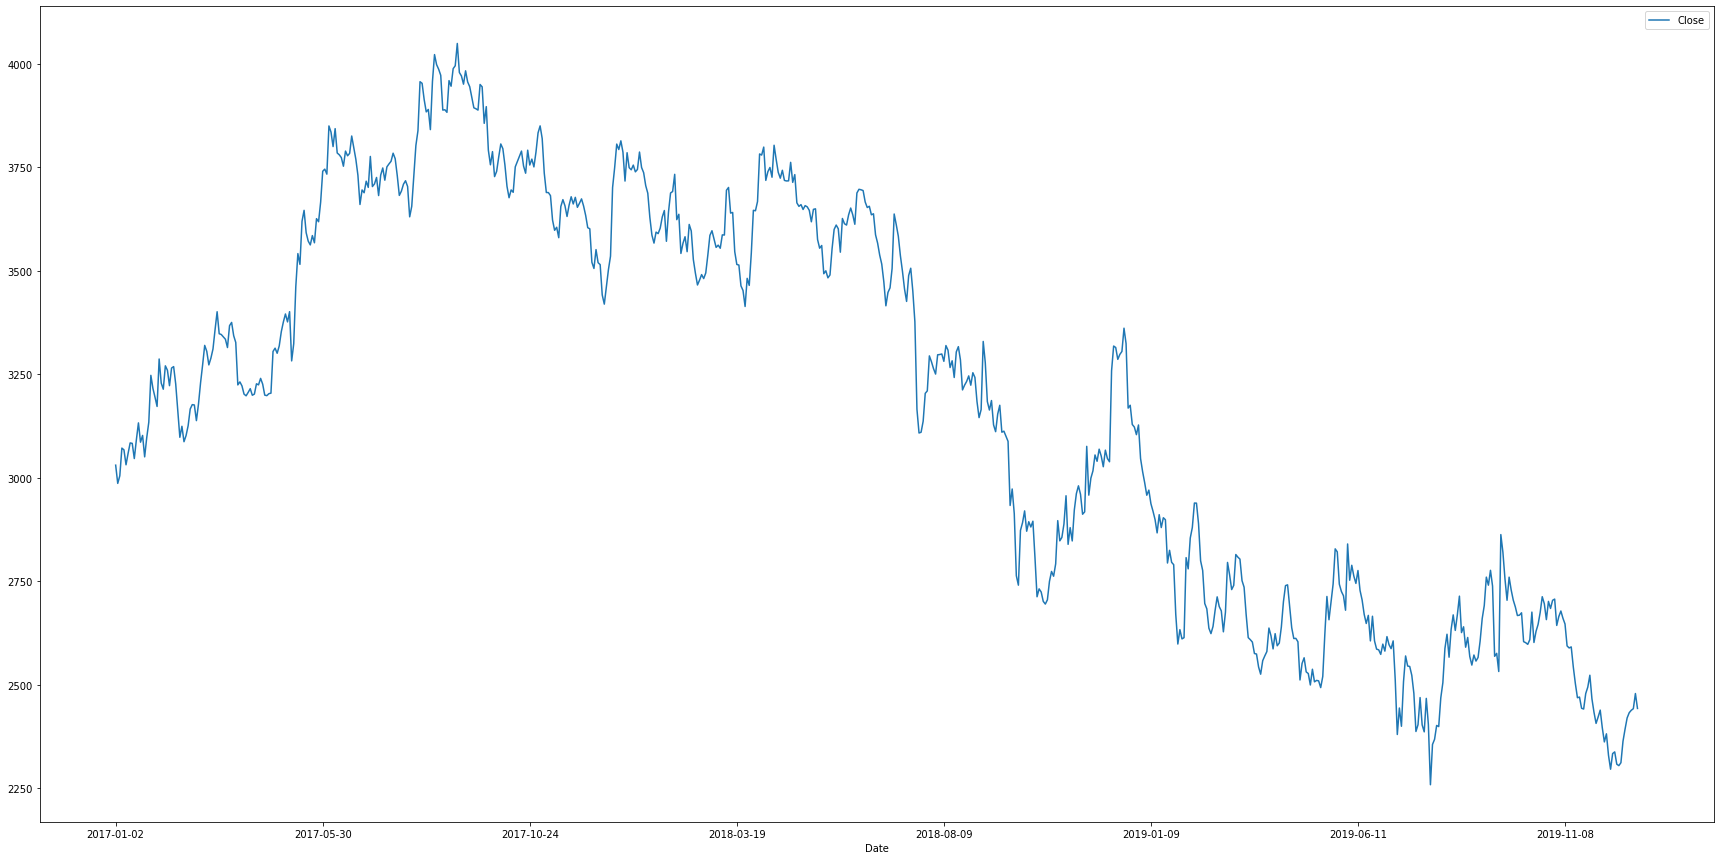

In [23]:
hero_df.plot(x='Date', y=['Close'], figsize=(30,15))

---

# 2. Decide on a prediction timeline for the pair

### 2.1 Get the Generated Orders dataset for the pair

In [24]:
pair1_orders_df = pd.read_csv("../../Preprocess/Pair1/Pair1_preprocessing_and_orders.csv")

In [25]:
pair1_orders_df.head()

,Date,Hero_Close,Bajaj_Close,Spread,zscore,Spread_20_Day_SMA,zscore_Spread_20_day_SMA,Orders
0,2018-10-10,2920.100098,2581.800049,338.300049,0.397766,298.057483,0.702011,FLAT
1,2018-10-11,2871.000000,2525.800049,345.199951,0.474415,294.832483,0.806742,FLAT
2,2018-10-12,2893.949951,2623.050049,270.899902,-0.350959,290.852478,-0.321035,FLAT
3,2018-10-15,2881.250000,2620.449951,260.800049,-0.463155,289.102478,-0.474337,FLAT
4,2018-10-16,2895.199951,2610.500000,284.699951,-0.197659,287.879980,-0.111568,FLAT


### 2.2 Show all orders which are not 'FLAT'

In [26]:
pair1_orders_df[pair1_orders_df["Orders"] != "FLAT"]

,Date,Hero_Close,Bajaj_Close,Spread,zscore,Spread_20_Day_SMA,zscore_Spread_20_day_SMA,Orders
7,2018-10-22,2731.800049,2556.899902,174.900146,-1.417389,271.300000,-1.778185,LONG
8,2018-10-23,2724.250000,2586.500000,137.750000,-1.830078,259.387500,-2.342075,LONG
11,2018-10-26,2705.350098,2513.750000,191.600098,-1.231875,241.092505,-1.524701,LONG
14,2018-10-31,2762.350098,2593.699951,168.650146,-1.486818,230.782507,-1.873051,LONG
17,2018-11-05,2847.800049,2672.550049,175.250000,-1.413502,236.842505,-1.772874,LONG
18,2018-11-06,2856.050049,2674.600098,181.449951,-1.344629,231.467505,-1.678767,LONG
21,2018-11-12,2839.350098,2652.300049,187.050049,-1.282420,212.482507,-1.593765,LONG
23,2018-11-14,2847.550049,2676.500000,171.050049,-1.460158,205.160010,-1.836624,LONG
26,2018-11-19,2980.649902,2679.649902,301.000000,-0.016587,208.854993,0.135845,GET_OUT_OF_POSITION
30,2018-11-26,3076.000000,2649.500000,426.500000,1.377550,238.764990,2.040770,SHORT


### 2.3 Visualizing the orders

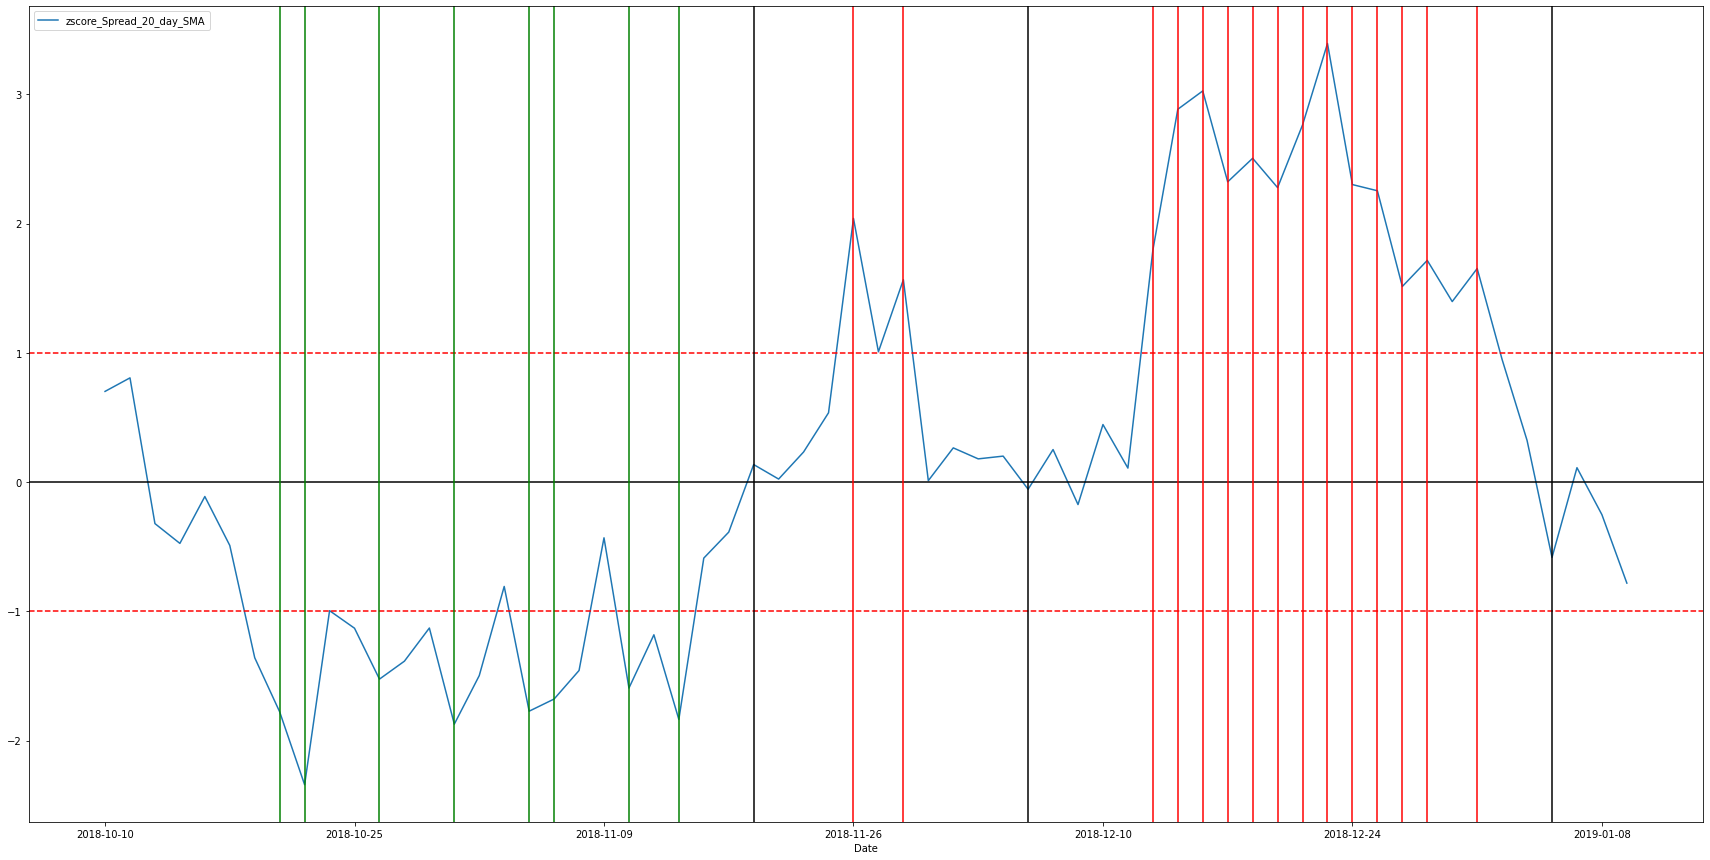

In [27]:
# Plotting the zscore of the Spread of 20 day Simple Moving Average
orders_plt = pair1_orders_df.plot(x='Date', y='zscore_Spread_20_day_SMA', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = pair1_orders_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")


#### In the figure above
- __Blue line__ - zscore of the Spread of 20 day Simple Moving Average
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


### 2.4 Choosing the predicition timeline

From the figure above, we see that there are many __short positions__ taken from __2018-12-10 to 2019-01-08__ (Format of date is YYYY-MM-DD). This is near the end of the correlation range. We thus choose this as the prediciton timeline for this model.

---

# 3. Creating Bajaj Training set

### 3.1. Features we are considering when training the model

In [28]:
# The features we are considering while training the model
features = ['High', 'Low', 'Open', 'Close', 'Volume']

### 3.2. Trimming data in range of dates 2018-06-09 to 2018-12-09 to train the Bajaj LSTM Model

In [29]:
# Getting data with the range of dates
X_train_bajaj = bajaj_df[(bajaj_df['Date'] >= '2018-06-09') & (bajaj_df['Date'] <= '2018-12-09')]
X_train_bajaj

,Date,High,Low,Open,Close,Volume,Adj Close,Company,Exchange
357,2018-06-11,2913.949951,2873.800049,2886.649902,2881.100098,413241.0,2642.592285,BAJAJ-AUTO,NSE
358,2018-06-12,2912.500000,2870.050049,2886.000000,2887.250000,539628.0,2648.233154,BAJAJ-AUTO,NSE
359,2018-06-13,2934.000000,2891.550049,2908.000000,2907.949951,362419.0,2667.219482,BAJAJ-AUTO,NSE
360,2018-06-14,2910.000000,2880.149902,2905.000000,2890.699951,333925.0,2651.397461,BAJAJ-AUTO,NSE
361,2018-06-15,2904.000000,2853.000000,2893.449951,2877.149902,370164.0,2638.969238,BAJAJ-AUTO,NSE
...,...,...,...,...,...,...,...,...,...
474,2018-12-03,2764.949951,2714.000000,2760.000000,2736.000000,386060.0,2561.085938,BAJAJ-AUTO,NSE
475,2018-12-04,2790.000000,2726.250000,2740.100098,2763.850098,395469.0,2587.155762,BAJAJ-AUTO,NSE
476,2018-12-05,2774.500000,2731.100098,2759.000000,2764.100098,178352.0,2587.389648,BAJAJ-AUTO,NSE
477,2018-12-06,2799.399902,2705.850098,2740.000000,2718.100098,468440.0,2544.330566,BAJAJ-AUTO,NSE


### 3.3. Extracting features to create the training data (Independent variables)

In [30]:
X_train_bajaj = X_train_bajaj[features]
X_train_bajaj

,High,Low,Open,Close,Volume
357,2913.949951,2873.800049,2886.649902,2881.100098,413241.0
358,2912.500000,2870.050049,2886.000000,2887.250000,539628.0
359,2934.000000,2891.550049,2908.000000,2907.949951,362419.0
360,2910.000000,2880.149902,2905.000000,2890.699951,333925.0
361,2904.000000,2853.000000,2893.449951,2877.149902,370164.0
...,...,...,...,...,...
474,2764.949951,2714.000000,2760.000000,2736.000000,386060.0
475,2790.000000,2726.250000,2740.100098,2763.850098,395469.0
476,2774.500000,2731.100098,2759.000000,2764.100098,178352.0
477,2799.399902,2705.850098,2740.000000,2718.100098,468440.0


### 3.4. Get the Close price to predict

In [31]:
y_train_bajaj = bajaj_df[(bajaj_df['Date'] >= '2018-06-12') & (bajaj_df['Date'] <= '2018-12-10')]
y_train_bajaj

,Date,High,Low,Open,Close,Volume,Adj Close,Company,Exchange
358,2018-06-12,2912.500000,2870.050049,2886.000000,2887.250000,539628.0,2648.233154,BAJAJ-AUTO,NSE
359,2018-06-13,2934.000000,2891.550049,2908.000000,2907.949951,362419.0,2667.219482,BAJAJ-AUTO,NSE
360,2018-06-14,2910.000000,2880.149902,2905.000000,2890.699951,333925.0,2651.397461,BAJAJ-AUTO,NSE
361,2018-06-15,2904.000000,2853.000000,2893.449951,2877.149902,370164.0,2638.969238,BAJAJ-AUTO,NSE
362,2018-06-18,2917.699951,2864.949951,2880.000000,2895.300049,427791.0,2655.616699,BAJAJ-AUTO,NSE
...,...,...,...,...,...,...,...,...,...
475,2018-12-04,2790.000000,2726.250000,2740.100098,2763.850098,395469.0,2587.155762,BAJAJ-AUTO,NSE
476,2018-12-05,2774.500000,2731.100098,2759.000000,2764.100098,178352.0,2587.389648,BAJAJ-AUTO,NSE
477,2018-12-06,2799.399902,2705.850098,2740.000000,2718.100098,468440.0,2544.330566,BAJAJ-AUTO,NSE
478,2018-12-07,2793.000000,2716.300049,2722.000000,2786.199951,417465.0,2608.076660,BAJAJ-AUTO,NSE


In [32]:
y_train_bajaj = y_train_bajaj['Close']
y_train_bajaj

358    2887.250000
359    2907.949951
360    2890.699951
361    2877.149902
362    2895.300049
          ...     
475    2763.850098
476    2764.100098
477    2718.100098
478    2786.199951
479    2725.100098
Name: Close, Length: 122, dtype: float64

---

# 4. Creating and Training the Bajaj SARIMA Model

In [34]:
model = SARIMAX(X_train_bajaj)

/home/varun487/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: SARIMAX models require univariate `endog`. Got shape (122, 5).